 <div class="alert alert-success"> 
<ul>
<li>Current estimates produces highly correlated lexical surprisal estimates compared to Piantadosi et al. (2011) for some Google 1T dataset.</li>
<li>English, French and Spanish are the closest to the previous reported numbers, followed by other Western European Romanc languages.</li>
<li>Polish and Czech have lower correlations. This is likely because they have a higher proportion of non-ASCII characters (everything was reduced to an ASCII string using unidecode for all languages).</li>
</ul>
<br />
Last updated 29 September 2019.
 </div>

In [1]:
library('ggplot2')
library('plyr')
source('freq-vs-info-content_helper.R')
source('config.R')

Loading required package: RJSONIO

Attaching package: ‘reshape’

The following objects are masked from ‘package:plyr’:

    rename, round_any

Loading required package: fit.models


# Spanish #

In [2]:
es = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-SPANISH-3.txt'),
    paste0(paths[['MG_Google1T']], 'Google1T/SPANISH/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


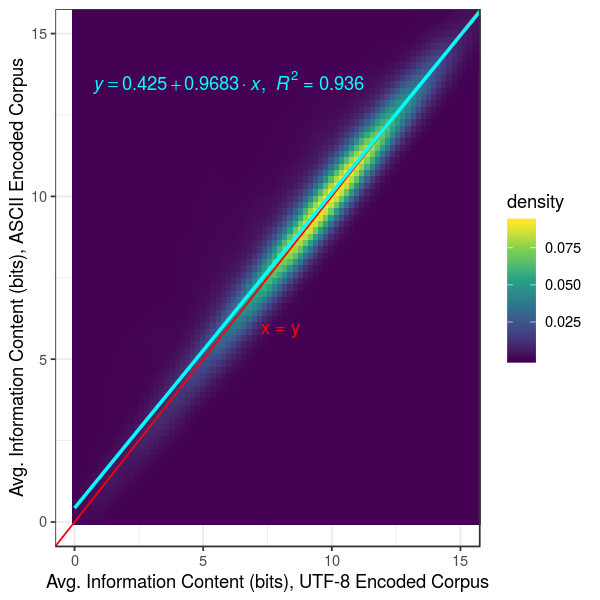

In [3]:
options(repr.plot.width=4, repr.plot.height=3)
getInfoContentPlot(es[1:25000,], 'pdfs/spanish_info_content_comparison.pdf', xlims=c(0,15), ylims = c(0,15))

In [4]:
getInfoContentCor(es[1:25000,])

[[1]]
[[1]]$spearman
[1] 0.9704717

[[1]]$pearson
[1] 0.967649


[[2]]
[[2]]$spearman
[1] 0.991829

[[2]]$pearson
[1] 0.9927525


[[3]]
[1] 25000

In [5]:
sum(as.numeric(es$frequency.x)) / sum(as.numeric(es$frequency.y)) #I have 20% more tokens

[1] 0.8253476

In [6]:
# Items with lowest residuals
es[order(es$residuals),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
11607,dentes,5.905779,1.649
26812,obstaculizando,9.324384,5.008
21362,inhibiendo,5.645804,1.703
7350,ciados,3.666631,0.000
33093,repercutiendo,11.626336,7.964


In [7]:
# Items with highest residuals
es[order(es$residuals, decreasing=T),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
18903,gobiernas,0.5363060,16.928
27601,padrinazgo,0.7180352,14.336
26825,obtenerlos,0.8011141,13.625
32745,rejunte,2.7753890,14.792
33340,reservara,5.5065500,17.096


# French #

In [8]:
fr = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-FRENCH-3.txt'),    
    paste0(paths[['MG_Google1T']], 'Google1T/FRENCH/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


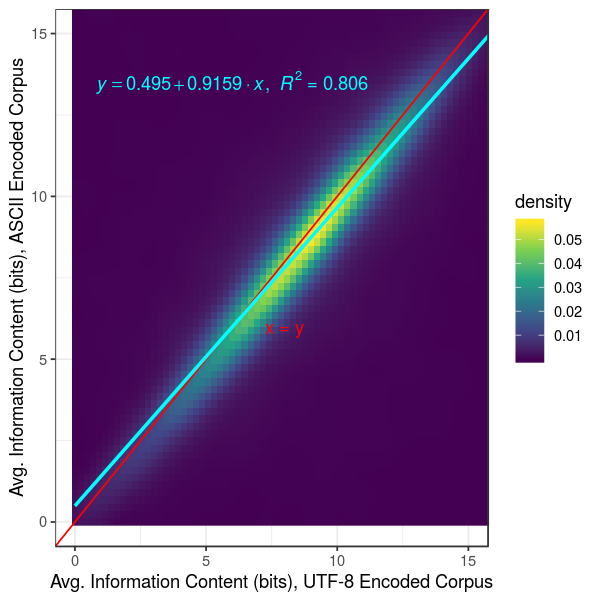

In [9]:
getInfoContentPlot(fr[1:25000,], 'pdfs/french_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [10]:
getInfoContentCor(fr)

[[1]]
[[1]]$spearman
[1] 0.9128905

[[1]]$pearson
[1] 0.9075017


[[2]]
[[2]]$spearman
[1] 0.9600942

[[2]]$pearson
[1] 0.9611951


[[3]]
[1] 32834

In [11]:
sum(as.numeric(fr$frequency.x)) /sum(as.numeric(fr$frequency.y)) # I have 34% more tokens

[1] 0.6648895

In [12]:
# Items with lowest residuals
fr[order(fr$residuals),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
2879,auditorat,15.13589,0.000
15532,inclina,12.20245,0.000
11963,expressionnisme,14.35977,2.694
2964,autodrome,14.84317,3.812
3098,avers,10.94925,0.217


In [13]:
# Items with highest residuals
fr[order(fr$residuals, decreasing=T),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
17199,kleptomanie,0.027395476,21.432
31097,travestisme,0.008218161,20.383
31241,trisomies,0.089151347,18.073
5194,capitalisez,2.012771559,18.412
26509,retapez,0.315892762,16.648


# English #

In [14]:
en = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-ENGLISH-3.txt'),    
    paste0(paths[['MG_Google1T']], 'Google1T/ENGLISH/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


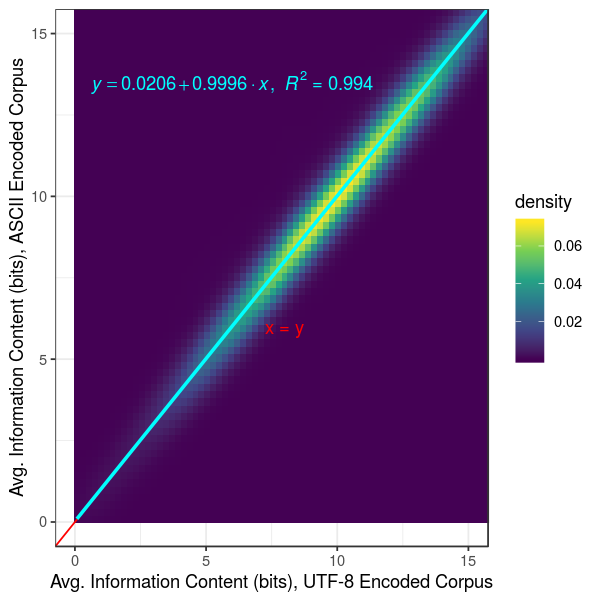

In [15]:
getInfoContentPlot(en[1:25000,], 'pdfs/english_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [16]:
print(getInfoContentCor(en))

[[1]]
[[1]]$spearman
[1] 0.9968288

[[1]]$pearson
[1] 0.9965403


[[2]]
[[2]]$spearman
[1] 0.9994366

[[2]]$pearson
[1] 0.9994728


[[3]]
[1] 49924



In [17]:
sum(as.numeric(en$frequency.x))/ sum(as.numeric(en$frequency.y)) 

[1] 0.9729379

# German #

In [18]:
de = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-GERMAN-3.txt'),    
    paste0(paths[['MG_Google1T']], 'Google1T/GERMAN/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


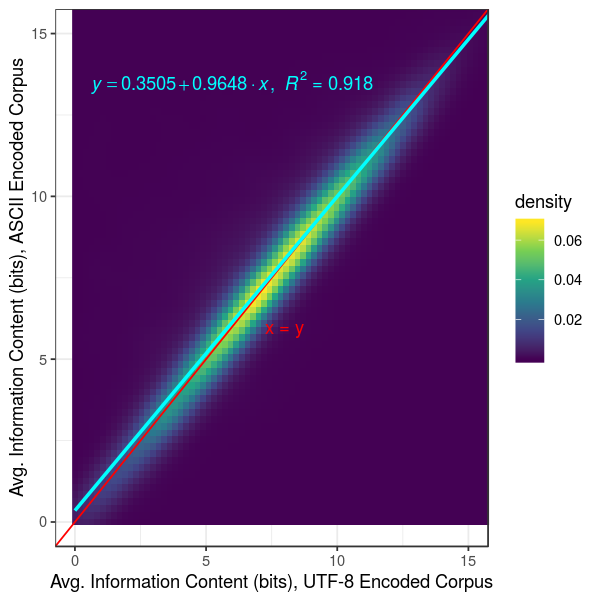

In [19]:
getInfoContentPlot(de[1:25000,], 'pdfs/german_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [20]:
getInfoContentCor(de)

[[1]]
[[1]]$spearman
[1] 0.9605717

[[1]]$pearson
[1] 0.9592997


[[2]]
[[2]]$spearman
[1] 0.9892762

[[2]]$pearson
[1] 0.9895373


[[3]]
[1] 40646

In [21]:
sum(as.numeric(de$frequency.x))/ sum(as.numeric(de$frequency.y)) # current finds slightly more tokens

[1] 0.841584

# Dutch #

In [22]:
nl = getInfoContentDF(    
    paste0(paths[['P11_Google1T']], 'surprisal-DUTCH-3.txt'),    
    paste0(paths[['MG_Google1T']], 'Google1T/DUTCH/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


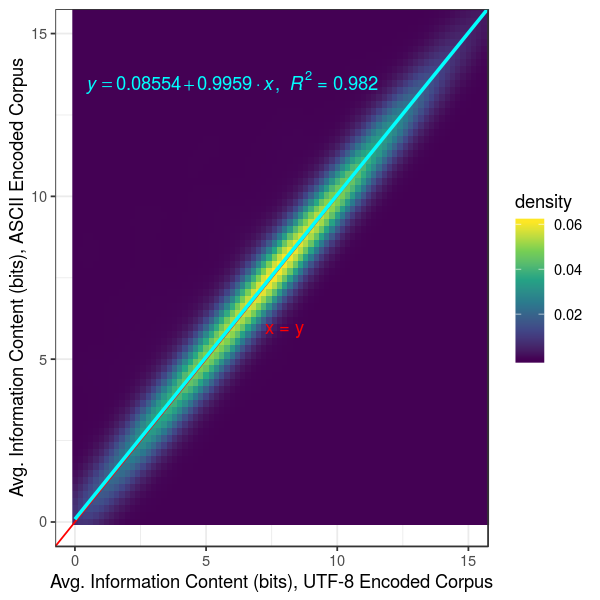

In [23]:
getInfoContentPlot(nl[1:25000,], 'pdfs/french_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [24]:
getInfoContentCor(nl)

[[1]]
[[1]]$spearman
[1] 0.9925905

[[1]]$pearson
[1] 0.9916469


[[2]]
[[2]]$spearman
[1] 0.9969757

[[2]]$pearson
[1] 0.9970451


[[3]]
[1] 49392

In [25]:
sum(as.numeric(nl$frequency.x))/ sum(as.numeric(nl$frequency.y)) #current finds the same number of tokens

[1] 0.9739287

# Czech #

In [26]:
cs = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-CZECH-3.txt'),    
paste0(paths[['MG_Google1T']], 'Google1T/CZECH/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            



Call:
lm(formula = surprisal ~ mean_surprisal_weighted, data = cs)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4183 -1.1958 -0.3420  0.8264 14.2387 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.238659   0.028474    43.5   <2e-16 ***
mean_surprisal_weighted 0.823067   0.007367   111.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.709 on 14418 degrees of freedom
Multiple R-squared:  0.464,	Adjusted R-squared:  0.464 
F-statistic: 1.248e+04 on 1 and 14418 DF,  p-value: < 2.2e-16



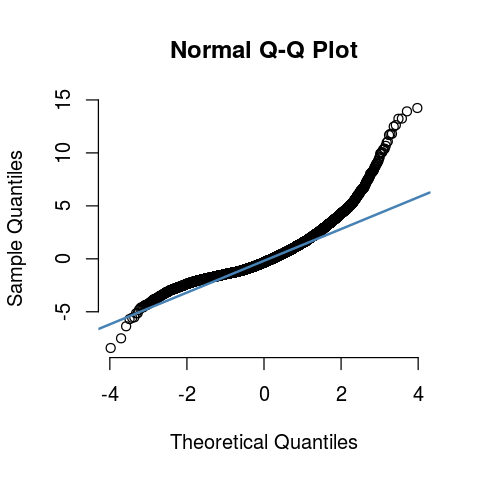

In [27]:
lm1 = lm(surprisal ~ mean_surprisal_weighted, cs)
resid = lm1$residuals
options(repr.plot.width=4, repr.plot.height=4)
qqnorm(resid, pch = 1, frame = FALSE)
qqline(resid, col = "steelblue", lwd = 2)
print(summary(lm1))

In [28]:
en$diff = en$surprisal - en$mean_surprisal_weighted

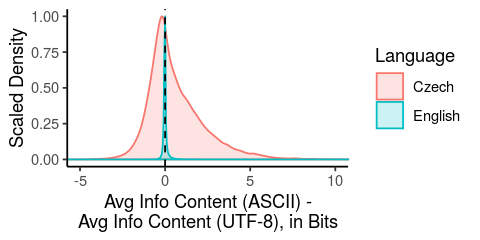

In [29]:
en$language = 'English'
cs$language = 'Czech'
cs_vs_english = rbind.fill(en, cs)
# this is already converted to bits
cs_vs_english$diff = cs_vs_english$surprisal - cs_vs_english$mean_surprisal_weighted
options(repr.plot.width=4, repr.plot.height=2)
p1 = ggplot(cs_vs_english) + geom_density(data=cs_vs_english, aes(x=diff, 
y=..scaled.., colour=language, fill=language), alpha=.2) + coord_cartesian(
xlim=c(-5,10)) + geom_vline(xintercept=0, colour='black', linetype ='dashed'
) + xlab('Avg Info Content (ASCII) -\nAvg Info Content (UTF-8), in Bits'
) + ylab('Scaled Density')  + theme_classic()  + guides(fill=guide_legend(
title="Language"))+ guides(colour=guide_legend(title="Language"))
print(p1)
ggsave('pdfs/czech_info_content_diff.pdf', width=4, height=2)

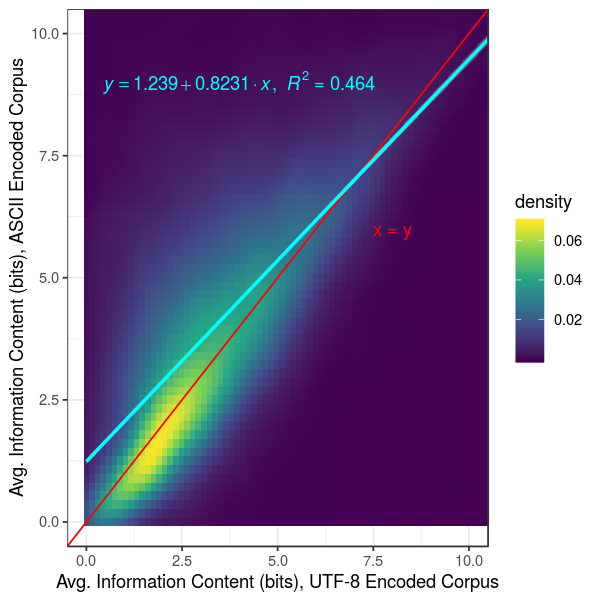

In [30]:
getInfoContentPlot(cs,'pdfs/czech_info_content_comparison.pdf', xlims=c(0,10
), ylims = c(0,10))

In [31]:
getInfoContentCor(cs)

[[1]]
[[1]]$spearman
[1] 0.6808774

[[1]]$pearson
[1] 0.681184


[[2]]
[[2]]$spearman
[1] 0.8530106

[[2]]$pearson
[1] 0.8714779


[[3]]
[1] 14420

In [32]:
sum(as.numeric(cs$frequency.x))/ sum(as.numeric(cs$frequency.y)) #current finds many more tokens

[1] 0.3161449

# Swedish #

In [33]:
sv = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-SWEDISH-3.txt'),    
paste0(paths[['MG_Google1T']], 'Google1T/SWEDISH/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


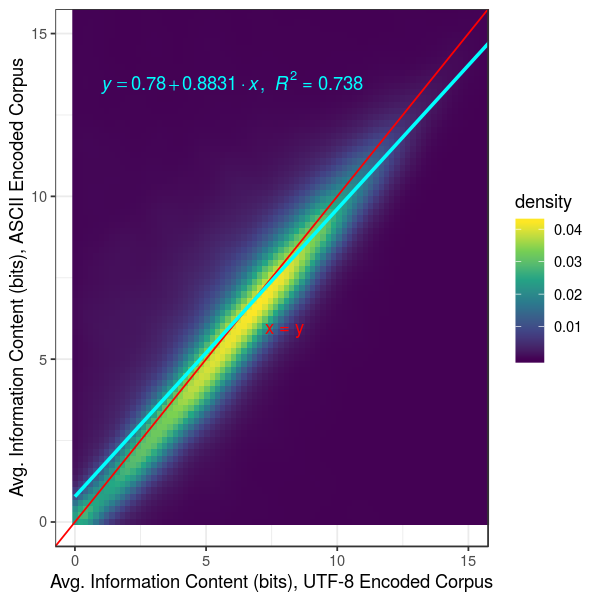

In [34]:
getInfoContentPlot(sv[1:25000,], 'pdfs/swedish_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [35]:
getInfoContentCor(sv)

[[1]]
[[1]]$spearman
[1] 0.8650907

[[1]]$pearson
[1] 0.8608043


[[2]]
[[2]]$spearman
[1] 0.9340265

[[2]]$pearson
[1] 0.9345003


[[3]]
[1] 31283

In [36]:
print(sum(as.numeric(sv$frequency.x)))
sum(as.numeric(sv$frequency.x))/ sum(as.numeric(sv$frequency.y)) #current finds  50% more tokens
# 8,944,073,669

[1] 8944073669


[1] 0.5634224

# Polish #

In [37]:
pl = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-POLISH-3.txt'),    
    paste0(paths[['MG_Google1T']], 'Google1T/POLISH/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


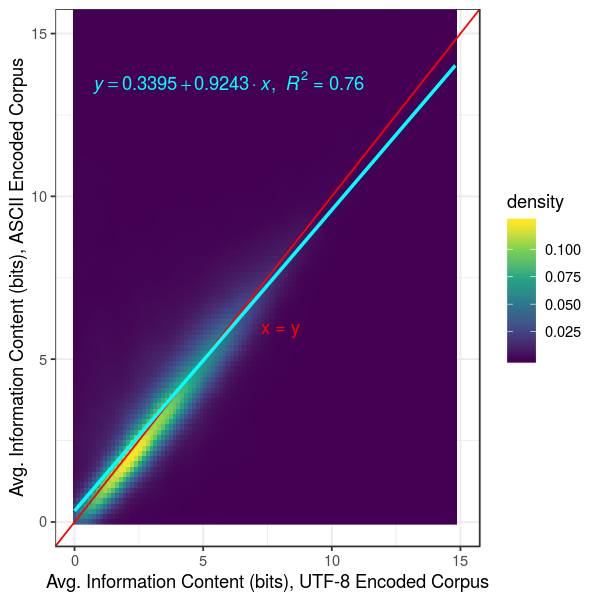

In [38]:
getInfoContentPlot(pl[1:25000,], 'pdfs/polish_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [39]:
getInfoContentCor(pl)

[[1]]
[[1]]$spearman
[1] 0.8773087

[[1]]$pearson
[1] 0.8715096


[[2]]
[[2]]$spearman
[1] 0.9369584

[[2]]$pearson
[1] 0.9381192


[[3]]
[1] 30942

In [40]:
sum(as.numeric(pl$frequency.x))/ sum(as.numeric(pl$frequency.y)) #current finds  40% more tokens

[1] 0.5951959

# Romanian #

In [41]:
ro = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-ROMANIAN-3.txt'),    
    paste0(paths[['MG_Google1T']], 'Google1T/ROMANIAN/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


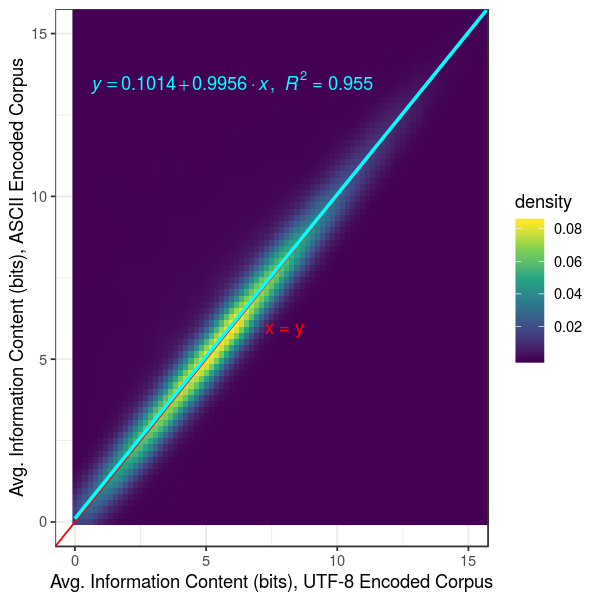

In [42]:
getInfoContentPlot(ro[1:25000,], 'pdfs/romanian_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [43]:
getInfoContentCor(ro)

[[1]]
[[1]]$spearman
[1] 0.9776358

[[1]]$pearson
[1] 0.9772745


[[2]]
[[2]]$spearman
[1] 0.9930208

[[2]]$pearson
[1] 0.9934749


[[3]]
[1] 42180

In [44]:
sum(as.numeric(ro$frequency.x))/ sum(as.numeric(ro$frequency.y)) #current finds  10% more tokens

[1] 0.9115853

# Italian #

In [45]:
it = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-ITALIAN-3.txt'),        
    paste0(paths[['MG_Google1T']], 'Google1T/ITALIAN/00_lexicalSurprisal/opus_meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


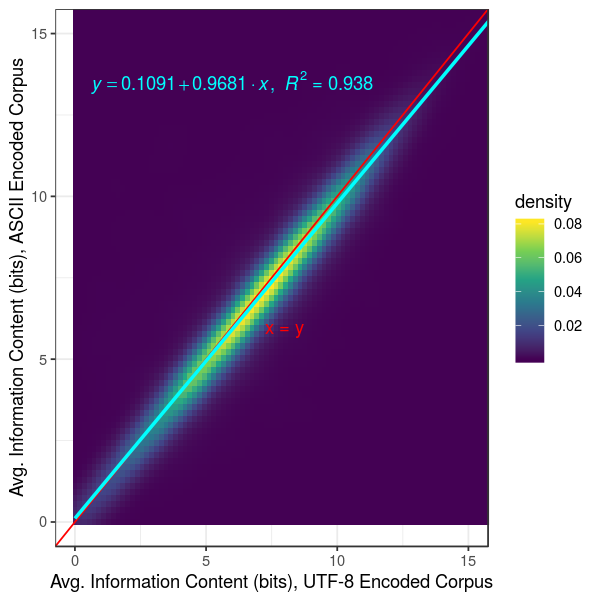

In [46]:
getInfoContentPlot(it[1:25000,], 'pdfs/italian_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [47]:
getInfoContentCor(it)

[[1]]
[[1]]$spearman
[1] 0.9746962

[[1]]$pearson
[1] 0.9737206


[[2]]
[[2]]$spearman
[1] 0.9877218

[[2]]$pearson
[1] 0.9881927


[[3]]
[1] 47927

In [48]:
sum(as.numeric(it$frequency.x))/ sum(as.numeric(it$frequency.y)) #current finds 10% more tokens

[1] 0.8908565

# Portuguese #

In [49]:
pt = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-PORTUGUESE-3.txt'),    
    paste0(paths[['MG_Google1T']], 'Google1T/PORTUGUESE/00_lexicalSurprisal/opus_meanSurprisal.csv'))

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


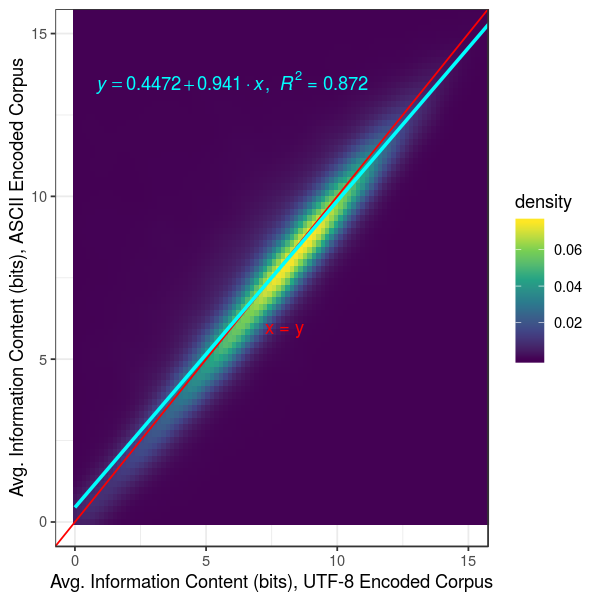

In [50]:
getInfoContentPlot(pt[1:25000,], 'pdfs/portuguese_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [51]:
getInfoContentCor(pt)

[[1]]
[[1]]$spearman
[1] 0.9372814

[[1]]$pearson
[1] 0.9372485


[[2]]
[[2]]$spearman
[1] 0.9793273

[[2]]$pearson
[1] 0.9818468


[[3]]
[1] 39754

In [52]:
sum(as.numeric(pt$frequency.x))/ sum(as.numeric(pt$frequency.y)) #current finds 30% more tokens

[1] 0.7297236